In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
from matplotlib import ticker

In [4]:
HysData = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'MaxHeights': [], 'Velocity': []}

for i in range(0,566):
    data = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Tolerance7and6/Data_' + str(i) + '.csv')
    data.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
    HysData['Time'].append(i*25 + 1475)
    HysData['SeaLevel'].append(data['sea level'][10])
    zs = data['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    HysData['MaxHeights'].append(MaxHeight)
    
for i in range(566):
    dataVelocity = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Tolerance7and6/DataVelocity_' + str(i) + '.csv')
    Vel = dataVelocity['velocity:0'].tolist()
    HysData['Velocity'].append(Vel[0])

for i in range(566):
    dataG = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Tolerance7and6/DataGrounded_' + str(i) + '.csv')
    Area = dataG['Area'].tolist()
    HysData['GroundedArea'].append(Area[0])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Tolerance7and6/Data_0.csv'

In [5]:
df = pd.DataFrame(data=HysData)
state = ["rise"]*106 + ["rumple"]*124 + ["rise"]*336
df["State"] = state
df

,Time,SeaLevel,GroundedArea,MaxHeights,Velocity,State
0,NaN,NaN,NaN,NaN,NaN,rise
1,NaN,NaN,NaN,NaN,NaN,rise
2,NaN,NaN,NaN,NaN,NaN,rise
3,NaN,NaN,NaN,NaN,NaN,rise
4,NaN,NaN,NaN,NaN,NaN,rise
...,...,...,...,...,...,...
561,NaN,NaN,NaN,NaN,NaN,rise
562,NaN,NaN,NaN,NaN,NaN,rise
563,NaN,NaN,NaN,NaN,NaN,rise
564,NaN,NaN,NaN,NaN,NaN,rise


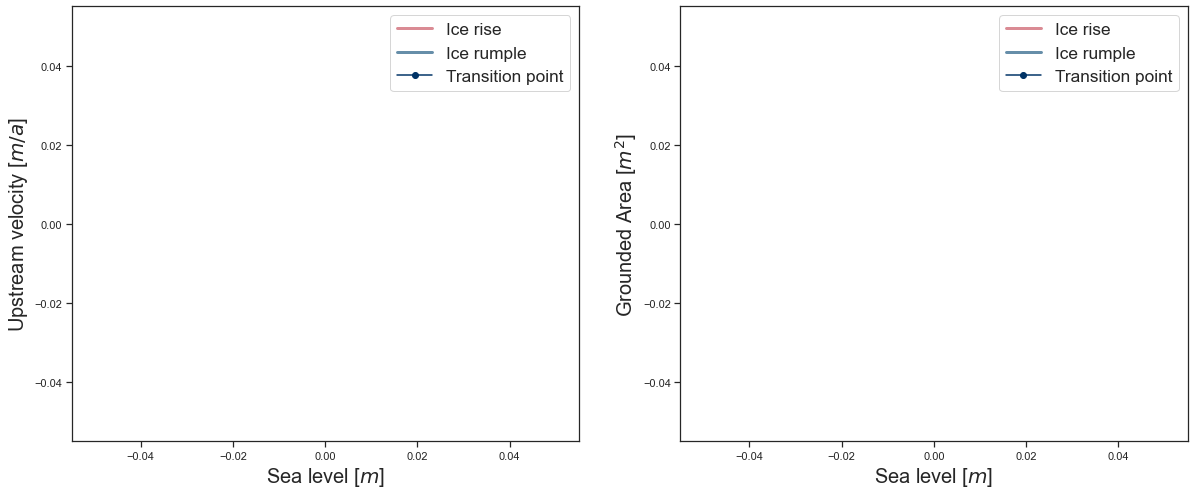

In [6]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(df.SeaLevel[0:105], df.Velocity[0:105], color="#da8b94", label="Ice rise", linewidth = 3.0)
ax[1].plot(df.SeaLevel[0:105], df.GroundedArea[0:105], color="#da8b94", label="Ice rise", linewidth = 3.0)

ax[0].plot(df.SeaLevel[104:229], df.Velocity[104:229], color="#668ea9", label="Ice rumple", linewidth = 3.0)
ax[1].plot(df.SeaLevel[104:229], df.GroundedArea[104:229], color="#668ea9", label="Ice rumple", linewidth = 3.0)

ax[0].plot(df.SeaLevel[228:281], df.Velocity[228:281], color="#da8b94", linewidth = 3.0)
ax[1].plot(df.SeaLevel[228:281], df.GroundedArea[228:281], color="#da8b94", linewidth = 3.0)

ax[0].plot(df.SeaLevel[104], df.Velocity[104], marker="o", color="#003366", label="Transition point")
ax[0].plot(df.SeaLevel[228], df.Velocity[228], marker="o", color="#003366")
ax[1].plot(df.SeaLevel[104], df.GroundedArea[104], marker="o", color="#003366", label="Transition point")
ax[1].plot(df.SeaLevel[228], df.GroundedArea[228], marker="o", color="#003366")

ax[0].set_xlabel("Sea level [$m$]", fontsize=20)
ax[0].set_ylabel("Upstream velocity [$m/a$]", fontsize=20)

ax[1].set_xlabel("Sea level [$m$]", fontsize=20)
ax[1].set_ylabel("Grounded Area [$m^2$]", fontsize=20)

#ax[0].set(xlabel="Sea level (m)", ylabel="Upstream velocity",size=6)
#ax[1].set(xlabel="Sea level (m)", ylabel="Grounded Area")

ax[0].legend(fontsize='x-large', title_fontsize='40')
ax[1].legend(fontsize='x-large', title_fontsize='40')
fig.savefig('PosterSubplots.jpg', format='jpg', dpi=700)

# Plot bedrock

# Sea level perturbation plot

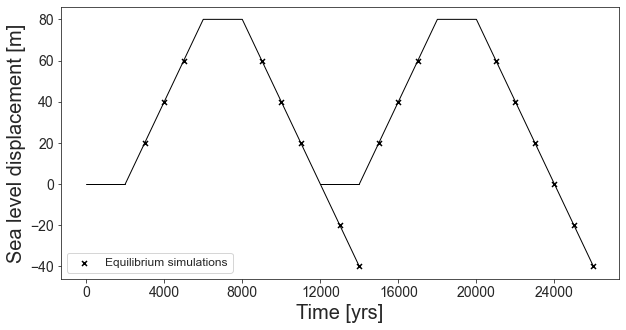

In [3]:
Time1 = [*range(0, 16000, 2000)]
SeaLevel1 = []
Time2 = [*range(12000, 28000, 2000)]
SeaLevel2 = []


for t in Time1:
    if t < 2000.0:
        SeaLevel1.append(0.0)
    elif t < 6000.0:
        SeaLevel1.append(-40.0 + 0.02*t)
    elif t < 8000.0:
        SeaLevel1.append(80.0)
    else:
        SeaLevel1.append(240.0 - 0.02*t)

for t in Time2:
    if t < 14000.0:
        SeaLevel2.append(0.0)
    elif t < 18000.0:
        SeaLevel2.append(-280.0 + 0.02*t)
    elif t < 20000.0:
        SeaLevel2.append(80.0)
    else:
        SeaLevel2.append(480.0 - 0.02*t)

SLB1 = pd.DataFrame(list(zip(Time1, SeaLevel1)), columns =['Time', 'SeaLevel'])
SLB2 = pd.DataFrame(list(zip(Time2, SeaLevel2)), columns =['Time', 'SeaLevel'])

#sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(10,5))

sns.lineplot(data=SLB1, x=SLB1["Time"][:2], y=SLB1["SeaLevel"][:2], color="black", linewidth = 1.0, zorder=0)
sns.lineplot(data=SLB2, x=SLB2["Time"][:2], y=SLB2["SeaLevel"][:2], color="black", linewidth = 1.0, zorder=0)

sns.lineplot(data=SLB1, x=SLB1["Time"][1:], y=SLB1["SeaLevel"][1:], color="black", linewidth = 1.0, zorder=0)
sns.lineplot(data=SLB2, x=SLB2["Time"][1:], y=SLB2["SeaLevel"][1:], color="black", linewidth = 1.0, zorder=0)

#sns.lineplot(data=SLB1, x="Time", y="SeaLevel", color="darkred", linewidth = 1.0, zorder=0, label="Experiment 1")
#sns.lineplot(data=SLB2, x="Time", y="SeaLevel", color="orange", linewidth = 1.0, zorder=0, label="Experiment 2")

plt.xlabel("Time [yrs]", fontsize=20)
plt.ylabel("Sea level displacement [m]", fontsize=20)
plt.xticks(np.arange(0, 37000, step=4000), fontsize=14)
plt.yticks(np.arange(-40, 100, step=20),fontsize=14)


X = [3000, 4000, 5000, 9000, 10000, 11000, 13000, 14000, 15000, 16000, 17000, 21000, 22000, 23000, 24000, 25000, 26000]
Y = [  20,   40,   60,    60,    40,    20,   -20,   -40,    20,    40,    60,    60,    40,    20,     0,   -20,   -40]

plt.scatter(x=X, y=Y, color='black', s=25, marker="x", label="Equilibrium simulations")
plt.legend(prop={'size': 12}, scatterpoints=1, loc='lower left')
plt.savefig('SeaLevelPlot.jpg', format='jpg', dpi=700, bbox_inches = "tight")



### Plot along-flow cross-section of domain

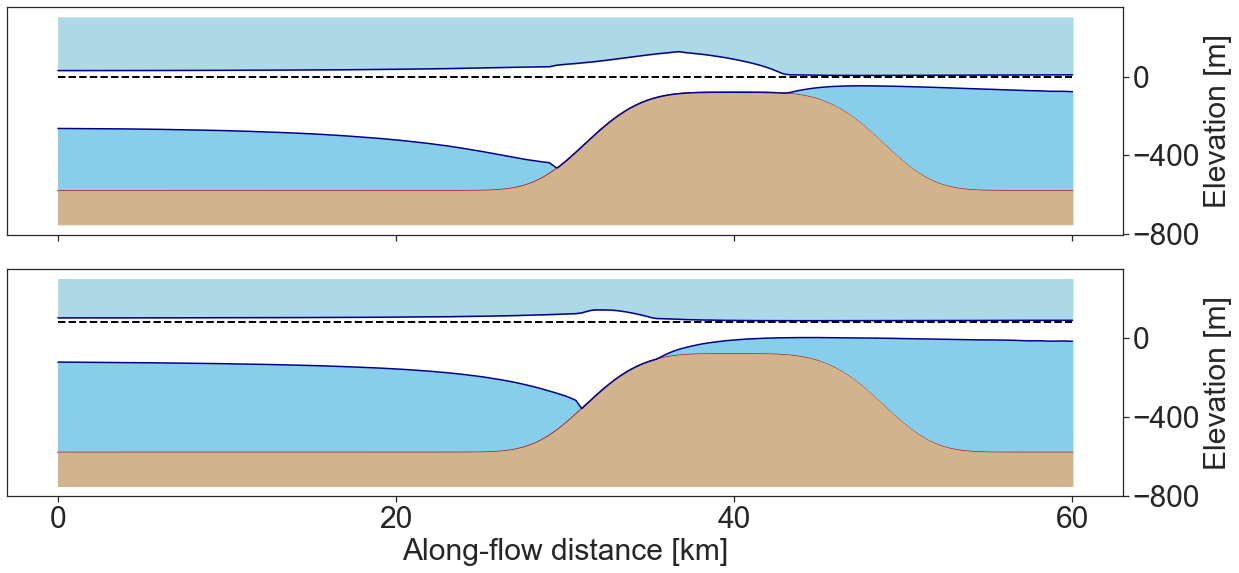

In [19]:
# Made using the Tolerance6StSt4000 run

M = 500.0
b0 = -580.0
sigma = 8.0
x0 = 40.0

X = np.arange(0, 60.1, 0.1)
Z = []

for x in X:
    Z.append(b0 + M * np.exp((-((x-x0)**2.0)**2)/(2.0*sigma**4)))

BedrockGeometry = pd.DataFrame(list(zip(X, Z)), columns =['x', 'z'])    
    
# Load the geometry of upper and lower surfaces of ice rise and rumple of the longer steady state runs

dataRiseUpper = pd.read_csv('RiseUpper.csv')
dataRiseUpper.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
dataRiseLower = pd.read_csv('RiseLower.csv')
dataRiseLower.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
dataRumpleUpper = pd.read_csv('RumpleUpper.csv')
dataRumpleUpper.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
dataRumpleLower = pd.read_csv('RumpleLower.csv')
dataRumpleLower.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)

dataRiseUpper = dataRiseUpper.sort_values('Points:0')
dataRiseLower = dataRiseLower.sort_values('Points:0')
dataRumpleUpper = dataRumpleUpper.sort_values('Points:0')
dataRumpleLower = dataRumpleLower.sort_values('Points:0')
    
# change from metres to kilometres
dataRiseUpper['Points:0'] = dataRiseUpper['Points:0']/1000.0
dataRiseLower['Points:0'] = dataRiseLower['Points:0']/1000.0
dataRumpleUpper['Points:0'] = dataRumpleUpper['Points:0']/1000.0
dataRumpleLower['Points:0'] = dataRumpleLower['Points:0']/1000.0

sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 1, figsize=(20,9), sharex='col')

g1 = sns.lineplot(data=dataRiseUpper, x="Points:0", y="Points:2", color="darkblue", linewidth = 1.5, ax=ax[0])
g2 = sns.lineplot(data=dataRiseLower, x="Points:0", y="Points:2", color="darkblue", linewidth = 1.5, zorder=1, ax=ax[0])
g3 = sns.lineplot(data=BedrockGeometry, x="x", y="z", color="brown", linewidth = 1.5, zorder=0, ax=ax[0])
g4 = sns.lineplot(data=dataRumpleUpper, x="Points:0", y="Points:2", color="darkblue", linewidth = 1.5, ax=ax[1])
g5 = sns.lineplot(data=dataRumpleLower, x="Points:0", y="Points:2", color="darkblue", linewidth = 1.5, zorder=1, ax=ax[1])
g6 = sns.lineplot(data=BedrockGeometry, x="x", y="z", color="brown", linewidth = 1.5, zorder=0, ax=ax[1])

ax[0].fill_between(BedrockGeometry['x'], -750, BedrockGeometry['z'], color='tan')
ax[0].fill_between(dataRiseLower['Points:0'], -500, dataRiseLower['Points:2'], color='skyblue', zorder=0)
ax[0].fill_between(BedrockGeometry['x'], -500, BedrockGeometry['z'], color='skyblue', zorder=0)
ax[0].fill_between(dataRiseUpper['Points:0'], dataRiseUpper['Points:2'], 300, color='lightblue', zorder=0)

ax[1].fill_between(BedrockGeometry['x'], -750, BedrockGeometry['z'], color='tan')
ax[1].fill_between(dataRumpleLower['Points:0'], -500, dataRumpleLower['Points:2'], color='skyblue', zorder=0)
ax[1].fill_between(BedrockGeometry['x'], -500, BedrockGeometry['z'], color='skyblue', zorder=0)
ax[1].fill_between(dataRumpleUpper['Points:0'], dataRumpleUpper['Points:2'], 300, color='lightblue', zorder=0)

ax[0].plot([0, 60], [0, 0], '--', lw=2, color='black')
ax[1].plot([0, 60], [80, 80], '--', lw=2, color='black')

#ax[0].set_title('(a) Steady state along-flow cross-section of an ice rise', fontsize=25)
#ax[1].set_title('(b) Steady state along-flow cross-section of an ice rumple', fontsize=25)
#ax[0].set_xlabel("Along-flow distance [km]", fontsize=30)
ax[0].set_ylabel("Elevation [m]", fontsize=30)
ax[1].set_xlabel("Along-flow distance [km]", fontsize=30)
ax[1].set_ylabel("Elevation [m]", fontsize=30)
#ax[0].set_xticks(np.arange(0, 65, step=5))
ax[0].set_yticks(np.arange(-800, 400, step=400))
ax[1].set_xticks(np.arange(0, 65, step=20))
ax[1].set_yticks(np.arange(-800, 400, step=400))


ax[0].tick_params(axis="y", labelsize=30)
ax[1].tick_params(axis="both", labelsize=30)
ax[0].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
fig.subplots_adjust(hspace=0.15)

plt.savefig('CrossSection.jpg', format='jpg', dpi=1000)



In [10]:
# dataRiseUpper, dataRiseLower, dataRumpleUpper, dataRumpleLower







# Plot New Transient Data: Experiment 1: Lower friction

In [12]:
Data = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/SeaLevel2_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/Vx_' + str(i) + '.csv')
    Data['Time'].append(i*25 + 2000)
    Data['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data['Velocity'].append(Vel[0])
    Data['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data['MaxHeights'].append(MaxHeight)

df = pd.DataFrame(data=Data)    
    
df['MaxHeights'] = df['MaxHeights']+80.0
df['AverageVelocity'] = df['Velocity']/df['Area']
df['Thickness'] = df['Area']/60000.0
#df['GroundedArea'] = df['GroundedArea']/10e6
dataSeaLevel

,Time,sea level,Points:0,Points:1,Points:2
0,476,-40,30535.0,-30000.0,-12.590
1,476,-40,28564.0,-30000.0,-12.478
2,476,-40,19781.0,-30000.0,-12.282
3,476,-40,17633.0,-30000.0,-12.328
4,476,-40,15893.0,-30000.0,-12.391
...,...,...,...,...,...
5662,476,-40,16205.0,20231.0,-10.718
5663,476,-40,17393.0,28634.0,-12.532
5664,476,-40,21210.0,27196.0,-12.237
5665,476,-40,15221.0,21716.0,-11.259


# Steady state simulations: Experiment 1: Lower Friction

In [13]:
StStData = {
    'SteadyStateTime' : [3000, 4000, 5000, 9000, 10000, 11000, 12000, 13000],
    'SteadyStateSeaLevel' : [20, 40, 60, 60, 40, 20, 0, -20],
    'SteadyStateGroundedAreas' : [],
    'SteadyStateIntegratedVelocities' : [],
    'SteadyStateIntegratedThicknesses' : [],
    'SteadyStateMaxHeights' : []
}

for i in StStData['SteadyStateTime']:
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/GroundedArea' + str(i) + '.csv')
    dataIntegratedVelocities = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/Velocity' + str(i) + '.csv')
    dataIntegratedThicknesses = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/Area' + str(i) + '.csv')
    dataMaxHeights = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/Height' + str(i) + '.csv')

    StStData['SteadyStateGroundedAreas'].append(dataGroundedArea['Area'][0])
    StStData['SteadyStateIntegratedVelocities'].append(dataIntegratedVelocities['velocity:0'][0])
    StStData['SteadyStateIntegratedThicknesses'].append(dataIntegratedThicknesses['Area'][0])
    
    zs = dataMaxHeights['Points:2'].tolist()
    MaxHeight = 0.0
    for j in zs:
        if j > MaxHeight:
            MaxHeight = j
    StStData['SteadyStateMaxHeights'].append(MaxHeight)

    
    
    
StStdf = pd.DataFrame(data=StStData)

StStdf['SteadyStateMaxHeights'] = StStdf['SteadyStateMaxHeights'] + 80.0
StStdf['AverageVelocity'] = StStdf['SteadyStateIntegratedVelocities']/StStdf['SteadyStateIntegratedThicknesses']
StStdf['Thickness'] = StStdf['SteadyStateIntegratedThicknesses']/60000.0

#StStdf['SteadyStateGroundedAreas'] = StStdf['SteadyStateGroundedAreas']/10e6

dataMaxHeights

    

,Points:0,Points:1,Points:2
0,30535.0,-30000.0,6.9352
1,28564.0,-30000.0,7.0345
2,19781.0,-30000.0,7.2214
3,17633.0,-30000.0,7.1793
4,15893.0,-30000.0,7.1198
...,...,...,...
5657,16205.0,20231.0,8.6932
5658,17393.0,28634.0,6.9962
5659,21210.0,27196.0,7.2799
5660,15221.0,21716.0,8.1802


# Plot New Transient Data: Experiment 2: Lower friction

In [15]:
Data2 = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment2Tol6/Transient/SeaLevel_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment2Tol6/Transient/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment2Tol6/Transient/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment2Tol6/Transient/Vx_' + str(i) + '.csv')
    Data2['Time'].append(i*25 + 14000)
    Data2['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data2['Velocity'].append(Vel[0])
    Data2['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data2['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data2['MaxHeights'].append(MaxHeight)

df2 = pd.DataFrame(data=Data2)    
    
df2['MaxHeights'] = df2['MaxHeights']+80.0
df2['AverageVelocity'] = df2['Velocity']/df2['Area']
df2['Thickness'] = df2['Area']/60000.0
#df['GroundedArea'] = df['GroundedArea']/10e6

dataSeaLevel

FileNotFoundError: [Errno 2] No such file or directory: '/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment2Tol6/Transient/GroundedArea_3.csv'

# Steady state simulations: Experiment 2

# Plot New Transient Data: Experiment 1: Higher friction

In [ ]:
Data = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/SeaLevel2_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/Vx_' + str(i) + '.csv')
    Data['Time'].append(i*25 + 2000)
    Data['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data['Velocity'].append(Vel[0])
    Data['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data['MaxHeights'].append(MaxHeight)

df = pd.DataFrame(data=Data)    
    
df['MaxHeights'] = df['MaxHeights']+80.0
df['AverageVelocity'] = df['Velocity']/df['Area']
df['Thickness'] = df['Area']/60000.0
#df['GroundedArea'] = df['GroundedArea']/10e6
dataSeaLevel

# Steady state simulations: Experiment 1: Higher Friction

In [ ]:
StStData = {
    'SteadyStateTime' : [3000, 4000, 5000, 9000, 10000, 11000, 12000, 13000],
    'SteadyStateSeaLevel' : [20, 40, 60, 60, 40, 20, 0, -20],
    'SteadyStateGroundedAreas' : [],
    'SteadyStateIntegratedVelocities' : [],
    'SteadyStateIntegratedThicknesses' : [],
    'SteadyStateMaxHeights' : []
}

for i in StStData['SteadyStateTime']:
    dataGroundedArea = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/GroundedArea' + str(i) + '.csv')
    dataIntegratedVelocities = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/Velocity' + str(i) + '.csv')
    dataIntegratedThicknesses = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/Area' + str(i) + '.csv')
    dataMaxHeights = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/SteadyStates/Height' + str(i) + '.csv')

    StStData['SteadyStateGroundedAreas'].append(dataGroundedArea['Area'][0])
    StStData['SteadyStateIntegratedVelocities'].append(dataIntegratedVelocities['velocity:0'][0])
    StStData['SteadyStateIntegratedThicknesses'].append(dataIntegratedThicknesses['Area'][0])
    
    zs = dataMaxHeights['Points:2'].tolist()
    MaxHeight = 0.0
    for j in zs:
        if j > MaxHeight:
            MaxHeight = j
    StStData['SteadyStateMaxHeights'].append(MaxHeight)

    
    
    
StStdf = pd.DataFrame(data=StStData)

StStdf['SteadyStateMaxHeights'] = StStdf['SteadyStateMaxHeights'] + 80.0
StStdf['AverageVelocity'] = StStdf['SteadyStateIntegratedVelocities']/StStdf['SteadyStateIntegratedThicknesses']
StStdf['Thickness'] = StStdf['SteadyStateIntegratedThicknesses']/60000.0

#StStdf['SteadyStateGroundedAreas'] = StStdf['SteadyStateGroundedAreas']/10e6

dataMaxHeights


In [ ]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(3, 2, figsize=(20,20), sharex='col', sharey='row')

# Plot (0,0)
ax[0][0].plot(df.SeaLevel[0:101], df.GroundedArea[0:101], color="lightgreen", label="Ice rise", linewidth = 2.0, zorder=0)
ax[0][0].plot(df.SeaLevel[101:359], df.GroundedArea[101:359], color="lightblue", label="Ice rumple", linewidth = 2.0, zorder=0)
ax[0][0].plot(df.SeaLevel[359:447], df.GroundedArea[359:447], color="lightgreen", linewidth = 2.0, zorder=0)
ax[0][0].scatter(df.SeaLevel[0], df.GroundedArea[0], color="black", marker='D', s=60, label='Starting point')

ax[0][0].plot(df2.SeaLevel[0:98], df2.GroundedArea[0:98], color="darkgreen", linewidth = 2.0)
ax[0][0].plot(df2.SeaLevel[97:360], df2.GroundedArea[97:360], color="darkblue", linewidth = 2.0)
ax[0][0].plot(df2.SeaLevel[359:402], df2.GroundedArea[359:402], color="darkgreen", linewidth = 2.0)

# Plot (0,1)
ax[0][1].plot(df2.SeaLevel[0:98], df2.GroundedArea[0:98], color="darkgreen", linewidth = 2.0)
ax[0][1].plot(df2.SeaLevel[97:360], df2.GroundedArea[97:360], color="darkblue", linewidth = 2.0)
ax[0][1].plot(df2.SeaLevel[359:402], df2.GroundedArea[359:402], color="darkgreen", linewidth = 2.0)
ax[0][1].scatter(df2.SeaLevel[0], df2.GroundedArea[0], color="black", marker='D', s=60)

# Plot (1,0)
ax[1][0].plot(df.SeaLevel[0:101], df.AverageVelocity[0:101], color="lightgreen", linewidth = 2.0, zorder=0)
ax[1][0].plot(df.SeaLevel[101:359], df.AverageVelocity[101:359], color="lightblue", linewidth = 2.0, zorder=0)
ax[1][0].plot(df.SeaLevel[359:447], df.AverageVelocity[359:447], color="lightgreen", linewidth = 2.0, zorder=0)
ax[1][0].scatter(df.SeaLevel[0], df.AverageVelocity[0], color="black", marker='D', s=60)

ax[1][0].plot(df2.SeaLevel[0:98], df2.AverageVelocity[0:98], color="darkgreen", linewidth = 2.0)
ax[1][0].plot(df2.SeaLevel[97:360], df2.AverageVelocity[97:360], color="darkblue", linewidth = 2.0)
ax[1][0].plot(df2.SeaLevel[359:402], df2.AverageVelocity[359:402], color="darkgreen", linewidth = 2.0)

# Plot (1,1)
ax[1][1].plot(df2.SeaLevel[0:97], df2.AverageVelocity[0:97], color="darkgreen", linewidth = 2.0)
ax[1][1].plot(df2.SeaLevel[97:359], df2.AverageVelocity[97:359], color="darkblue", linewidth = 2.0)
ax[1][1].plot(df2.SeaLevel[359:402], df2.AverageVelocity[359:402], color="darkgreen", linewidth = 2.0)
ax[1][1].scatter(df2.SeaLevel[0], df2.AverageVelocity[0], color="black", marker='D', s=60)

# Plot (2,0)
ax[2][0].plot(df.SeaLevel[0:101], df.Thickness[0:101], color="lightgreen", label="Ice rise", linewidth = 2.0, zorder=0)
ax[2][0].plot(df.SeaLevel[101:359], df.Thickness[101:359], color="lightblue", label="Ice rise", linewidth = 2.0, zorder=0)
ax[2][0].plot(df.SeaLevel[359:447], df.Thickness[359:447], color="lightgreen", linewidth = 2.0, zorder=0)
ax[2][0].scatter(df.SeaLevel[0], df.Thickness[0], color="black", marker='D', s=60)

ax[2][0].plot(df2.SeaLevel[0:97], df2.Thickness[0:97], color="darkgreen", linewidth = 2.0)
ax[2][0].plot(df2.SeaLevel[97:359], df2.Thickness[97:359], color="darkblue", linewidth = 2.0)
ax[2][0].plot(df2.SeaLevel[359:405], df2.Thickness[359:405], color="darkgreen", linewidth = 2.0)

# Plot (2,1)
ax[2][1].plot(df2.SeaLevel[0:97], df2.Thickness[0:97], color="darkgreen", linewidth = 2.0)
ax[2][1].plot(df2.SeaLevel[97:359], df2.Thickness[97:359], color="darkblue", linewidth = 2.0)
ax[2][1].plot(df2.SeaLevel[359:405], df2.Thickness[359:405], color="darkgreen", linewidth = 2.0)
ax[2][1].scatter(df2.SeaLevel[0], df2.Thickness[0], color="black", marker='D', s=60)

################################################################################################################

ax[0][0].plot(df.SeaLevel[100], df.GroundedArea[100], marker="o", color="black")
ax[0][0].plot(df.SeaLevel[358], df.GroundedArea[358], marker="o", color="black")
ax[1][0].plot(df.SeaLevel[100], df.AverageVelocity[100], marker="o", color="black")
ax[1][0].plot(df.SeaLevel[358], df.AverageVelocity[358], marker="o", color="black")
ax[2][0].plot(df.SeaLevel[100], df.Thickness[100], marker="o", color="black")
ax[2][0].plot(df.SeaLevel[358], df.Thickness[358], marker="o", color="black")

ax[0][1].plot(df2.SeaLevel[97], df2.GroundedArea[97], marker="o", color="black")
ax[0][1].plot(df2.SeaLevel[358], df2.GroundedArea[358], marker="o", color="black")
ax[1][1].plot(df2.SeaLevel[97], df2.AverageVelocity[97], marker="o", color="black")
ax[1][1].plot(df2.SeaLevel[358], df2.AverageVelocity[358], marker="o", color="black")
ax[2][1].plot(df2.SeaLevel[97], df2.Thickness[97], marker="o", color="black")
ax[2][1].plot(df2.SeaLevel[358], df2.Thickness[358], marker="o", color="black")

ax[0][0].scatter(StStdf.SteadyStateSeaLevel, StStdf.SteadyStateGroundedAreas, marker="x", s=60, color="black", label='Transition point')
ax[1][0].scatter(StStdf.SteadyStateSeaLevel, StStdf.AverageVelocity, marker="x", s=60, color="black")
ax[2][0].scatter(StStdf.SteadyStateSeaLevel, StStdf.Thickness, marker="x", s=60, color="black")

ax[0][1].scatter(StStdf2.SteadyStateSeaLevel[0:6], StStdf2.SteadyStateGroundedAreas[0:6], marker="x", s=60, color="black")
ax[1][1].scatter(StStdf2.SteadyStateSeaLevel[0:6], StStdf2.AverageVelocity[0:6], marker="x", s=60, color="black")
ax[2][1].scatter(StStdf2.SteadyStateSeaLevel[0:6], StStdf2.Thickness[0:6], marker="x", s=60, color="black")

ax[2][0].set_xlabel("Sea level displacement [$m$]", fontsize=30)
ax[2][1].set_xlabel("Sea level displacement [$m$]", fontsize=30)

ax[0][0].set_ylabel("Grounded area [$m^2$]", fontsize=30)
ax[1][0].set_ylabel("$v_x$ [$m/a$]", fontsize=30)
ax[2][0].set_ylabel("Average thickness [$m$]", fontsize=30)

ax[0][0].tick_params(axis="both", labelsize=16)
ax[1][0].tick_params(axis="both", labelsize=16)
ax[2][0].tick_params(axis="both", labelsize=16)
ax[0][1].tick_params(axis="both", labelsize=16)
ax[1][1].tick_params(axis="both", labelsize=16)
ax[2][1].tick_params(axis="both", labelsize=16)

ax[0][0].ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True)
ax[0][1].ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True)

ax[0][0].set_title('Experiment 1', fontsize=25)
ax[0][1].set_title('Experiment 2', fontsize=25)

ax[0][0].yaxis.get_offset_text().set_fontsize(24)
ax[1][0].yaxis.get_offset_text().set_fontsize(24)

ax[0][1].set_xlim(-40,100)
ax[1][1].set_xlim(-40,100)
ax[2][1].set_xlim(-40,100)

ax[0][1].set_ylim(0.2e8,1.4e8)
ax[1][1].set_ylim(260,400)
ax[2][1].set_ylim(230,320)

ax[0][0].legend(fontsize='x-large', title_fontsize='50', scatterpoints=1)

ax[0][0].grid(linestyle=':')
ax[1][0].grid(linestyle=':')
ax[2][0].grid(linestyle=':')
ax[0][1].grid(linestyle=':')
ax[1][1].grid(linestyle=':')
ax[2][1].grid(linestyle=':')

plt.subplots_adjust(wspace=0.08, hspace=0.1)
 
fig.savefig('HysteresisPlots.jpg', format='jpg', dpi=700, bbox_inches = "tight")


### Plot vertically integrated velocities showing transition

In [ ]:
timesIncrease = [0, 20, 40, 60, 80, 100, 120, 140, 160]
timesDecrease = [240, 260, 280, 300, 320, 340, 360, 380, 400]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 2, figsize=(20,15))
for k in timesIncrease:
    dataIntVel = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/VerticallyIntegratedVelocity_' + str(k) + '.csv')
    dataIntVel.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
    dataIntVel.drop('velocity:1', inplace=True, axis=1)
    dataIntVel.drop('velocity:2', inplace=True, axis=1)
    dataIntVel.drop('Points:1', inplace=True, axis=1)
    dataIntVel.drop('Time', inplace=True, axis=1)
    dataIntVel.sort_values(by=['Points:2'], ascending=True, inplace=True)

    AlongFlow = {}
    for i in dataIntVel['Points:0']:
        if i not in AlongFlow:
            AlongFlow[i] = [[],[]]

    for i in range(dataIntVel.shape[0]):
        x = dataIntVel.iloc[i]['Points:0']
        z = dataIntVel.iloc[i]['Points:2']
        vx = dataIntVel.iloc[i]['velocity:0']
        AlongFlow[x][0].append(z)
        AlongFlow[x][1].append(vx)

    X = list(AlongFlow.keys())
    VX = []

    for i in AlongFlow:
        avg = 0.5*AlongFlow[i][1][0] + 0.5*AlongFlow[i][1][9]
        for j in range(1,9):
            avg = avg + AlongFlow[i][1][j]
        avg = avg/9.0
        VX.append(avg)


    results = pd.DataFrame(list(zip(X, VX)), columns =['Distance', 'Velocity'])

    results.sort_values(by=['Distance'], ascending=True, inplace=True)

    ax[0][0].plot(results['Distance']/1000.0, results['Velocity'], label=str(k/2))
    
    ax[0][1].plot(results['Distance'][40:90]/1000.0, results['Velocity'][40:90], label=str(k/2))

    
for k in timesDecrease:
    dataIntVel = pd.read_csv('/Users/clara.henry/OneDrive/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/VerticallyIntegratedVelocity_' + str(k) + '.csv')
    dataIntVel.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
    dataIntVel.drop('velocity:1', inplace=True, axis=1)
    dataIntVel.drop('velocity:2', inplace=True, axis=1)
    dataIntVel.drop('Points:1', inplace=True, axis=1)
    dataIntVel.drop('Time', inplace=True, axis=1)
    dataIntVel.sort_values(by=['Points:2'], ascending=True, inplace=True)

    AlongFlow = {}
    for i in dataIntVel['Points:0']:
        if i not in AlongFlow:
            AlongFlow[i] = [[],[]]

    for i in range(dataIntVel.shape[0]):
        x = dataIntVel.iloc[i]['Points:0']
        z = dataIntVel.iloc[i]['Points:2']
        vx = dataIntVel.iloc[i]['velocity:0']
        AlongFlow[x][0].append(z)
        AlongFlow[x][1].append(vx)

    X = list(AlongFlow.keys())
    VX = []

    for i in AlongFlow:
        avg = 0.5*AlongFlow[i][1][0] + 0.5*AlongFlow[i][1][9]
        for j in range(1,9):
            avg = avg + AlongFlow[i][1][j]
        avg = avg/9.0
        VX.append(avg)


    results = pd.DataFrame(list(zip(X, VX)), columns =['Distance', 'Velocity'])

    results.sort_values(by=['Distance'], ascending=True, inplace=True)

    ax[1][0].plot(results['Distance']/1000.0, results['Velocity'], label=str(k/2))
    ax[1][1].plot(results['Distance'][40:90]/1000.0, results['Velocity'][40:90], label=str(k/2))

for i in range(2):
    ax[i][0].plot([0, 60],[0, 0], '--', label='Zero velocity')
    ax[i][1].plot([27.8, 34.5],[0, 0], '--', label='Zero velocity')
    for j in range(2):
        ax[i][j].legend()
        
ax[0][0].set_title('Sea level increase', fontsize=25)
ax[0][1].set_title('Zoomed in', fontsize=25)
ax[1][0].set_title('Sea level decrease', fontsize=25)
ax[1][1].set_title('Zoomed in', fontsize=25)

ax[1][0].set_xlabel("Sea level perturbation [$m$]", fontsize=30)
ax[1][1].set_xlabel("Sea level perturbation [$m$]", fontsize=30)

ax[0][0].set_ylabel("V_x", fontsize=30)
ax[0][1].set_ylabel("$v_x$ [$m/a$]", fontsize=30)
ax[1][0].set_ylabel("Maximum feature height [$m$]", fontsize=30)
ax[1][1].set_ylabel("Average thickness [$m$]", fontsize=30)


## Calculate force balances

In [ ]:
rhoi = 900
rhow = 1000
g = 9.8
n = 2
A = 2.3e-25 #4.6

def effStrain(exx, eyy, ezz, exy, exz, eyz):
    return 0.5*(exx**2 + eyy**2 + ezz**2) + exy**2 + exz**2 + eyz**2

# The value used for B corresponds to the example in Still et al., 2019 under 'Inverse rate factor'
def effVisc(eStrain):
    (1/A)**(1/3) * (1/(2*eStrain**(1-1/n)))
    
def Fdrag():
    
    
